In [0]:
pip install graphviz

Python interpreter will be restarted.
Collecting graphviz
 Downloading graphviz-0.19.1-py3-none-any.whl (46 kB)
Installing collected packages: graphviz
Successfully installed graphviz-0.19.1
Python interpreter will be restarted.

In [0]:
import numpy as np
import pandas as pd
import random as rn
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers.experimental import preprocessing

#from keras import Sequential
from numpy import asarray, zeros
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

from pyspark.sql.functions import col, expr, when, udf
from pyspark.sql.types import StringType, DoubleType, IntegerType
import pyspark.sql.functions as f

In [0]:
data1=spark.read.format("csv").option("delimiter", ";").option("header", "true").load("dbfs:/mnt/daneetnicos/CNPV/BASE_PERSONAS.csv")
display(data1)

COD_ENCUESTAS,ID_VIVIENDA,ID_HOGAR,ID_PERSONA_HOGAR,PA_TIPO_DOC,P_NROHOG,UID_ORIGEN,P_NRO_PER,P_SEXO,P_EDAD,P_ALFABETA,P_NIVEL_ANOS,PA1_GRP_ETNIC,PA11_COD_ETNIA,PA12_CLAN,PA21_COD_VITSA,PA22_COD_KUMPA,PA_LUG_NAC,PA1_DPTO_NAC,PA2_MPIO_NAC,PA3_PAIS_NAC,PA31_ANO_LLEGO,PA_SABE_FECHA,PA1_FECHA_NAC,P_PARENTESCO,CONDICION_FISICA,P_LIM_PPAL,P_CAUSA_LIM,PA_AYUDA_TEC,PB_AYUDA_PERS,PC_AYUDA_MED,PD_AYUDA_ANCES,P_CUIDA,PA_ASISTENCIA,P_TRABAJO,PA_HABLA_LENG,PA1_ENTIENDE,PB1_QOTRAS_LENG,PA_VIVIA_5ANOS,PA1_DPTO_5ANOS,PA2_MPIO_5ANOS,PA21_CLASE_5ANOS,PA3_PAIS_5ANO,PA31_ANO_LLEGA5,PA_VIVIA_1ANO,PA1_DPTO_1ANO,PA2_MPIO_1ANO,PA21_CLASE_1ANO,PA3_PAIS_1ANO,P_ENFERMO,P_QUEHIZO_PPAL,PA_LO_ATENDIERON,PA1_CALIDAD_SERV,PA_HNV,PA1_THNV,PA2_HNVH,PA3_HNVM,PA_HNVS,PA1_THSV,PA2_HSVH,PA3_HSVM,PA_HFC,PA1_THFC,PA2_HFCH,PA3_HFCM,PA_UHNV,PA1_MES_UHNV,PA2_ANO_UHNV,PA_OIR,PB_HABLAR,PC_VER,PD_CAMINAR,PE_COGER,PF_DECIDIR,PG_COMER,PH_RELACION,PI_TAREAS,PB_OTRAS_LENG,P_EST_CIVIL,REGIMEN,ESTADO_AFILIACION,CODIGO_AFP,VICTIMA,PENSIONADO,U_DPTO,U_MPIO,UA_CLASE,UA2_CPOB,UA1_LOCALIDAD,U_CO,U_AO,U_UC,COD_DANE,UVA_ESTATER,UVA1_TIPOTER,UVA2_CODTER,UVA_ESTA_AREAPROT,UVA1_COD_AREAPROT,LOCALIDAD
1,4eabd762-6134-4817-b564-52453efb75e3,fe04a56b-54e7-42cb-8533-b84fbf36cb83,55211bc6-b777-4711-9bd9-0c66805d8176,3,1,1,2,1,53,1,14,6,null,null,null,null,1,null,null,null,null,1,02FEB1965,2,2,null,null,null,null,null,null,null,2,3,null,null,null,2,null,null,1,null,null,2,null,null,1,null,2,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1,C,AC,25-14,null,null,05,05045,1,000,01,104,104003,027783,0504510000000000040315,null,null,null,2,null,null
1,4eabd762-6134-4817-b564-52453efb75e3,fe04a56b-54e7-42cb-8533-b84fbf36cb83,ae773535-145d-4e0c-a87c-033518eaae90,3,1,1,3,1,18,1,9,6,null,null,null,null,1,null,null,null,null,1,19SEP1999,12,2,null,null,null,null,null,null,null,2,1,null,null,null,2,null,null,1,null,null,2,null,null,1,null,2,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,7,C,AC,230301,1,null,05,05045,1,000,01,104,104003,027783,0504510000000000040315,null,null,null,2,null,null
1,4eabd762-6134-4817-b564-52453efb75e3,fe04a56b-54e7-42cb-8533-b84fbf36cb83,02a500ed-2d2d-4033-9703-a83177976409,3,1,1,1,2,25,1,14,6,null,null,null,null,1,null,null,null,null,1,21JAN1993,3,2,null,null,null,null,null,null,null,2,1,null,null,null,2,null,null,1,null,null,2,null,null,1,null,2,null,null,null,9,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1,S,AC,null,1,null,05,05045,1,000,01,104,104003,027783,0504510000000000040315,null,null,null,2,null,null
1,4eabd762-6134-4817-b564-52453efb75e3,fe04a56b-54e7-42cb-8533-b84fbf36cb83,e0849e0d-9cd4-4238-aba7-5d3162e1ea41,3,1,1,4,2,52,1,4,6,null,null,null,null,1,null,null,null,null,1,16SEP1965,1,2,null,null,null,null,null,null,null,2,7,null,null,null,2,null,null,1,null,null,2,null,null,1,null,2,null,null,null,1,3,1,2,1,3,1,2,1,3,1,2,1,3,1987,null,null,null,null,null,null,null,null,null,null,1,C,AC,null,1,null,05,05045,1,000,01,104,104003,027783,0504510000000000040315,null,null,null,2,null,null
3,e0711efa-6f09-40f0-a69d-5bfbeef1917c,6349df3d-cb31-45a0-b94b-c8014119028b,e0f555cf-ebba-4bbb-b20a-f048998889f0,3,1,1,2,1,68,1,7,5,null,null,null,null,2,13,13001,null,null,1,23APR1950,1,2,null,null,null,null,null,null,null,2,0,null,null,null,2,null,null,1,null,null,2,null,null,1,null,1,1,1,2,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,2,S,AC,null,null,null,13,13440,2,002,99,001,001002,247921,1344020020300200010102,2,null,null,2,null,null
3,e0711efa-6f09-40f0-a69d-5bfbeef1917c,6349df3d-cb31-45a0-b94b-c8014119028b,11a0ed60-f041-4b62-b90b-9962e2ff1655,3,1,1,1,2,64,1,8,5,null,null,null,null,2,66,66682,null,null,1,17FEB1954,2,2,null,null,null,null,null,null

In [0]:
print(data1.rdd.getNumPartitions())

100

In [0]:
data_1=data1.toPandas()

In [0]:
data_1

Out[9]:

,COD_ENCUESTAS,ID_VIVIENDA,ID_HOGAR,ID_PERSONA_HOGAR,PA_TIPO_DOC,P_NROHOG,UID_ORIGEN,P_NRO_PER,P_SEXO,P_EDAD,P_ALFABETA,P_NIVEL_ANOS,PA1_GRP_ETNIC,PA11_COD_ETNIA,PA12_CLAN,PA21_COD_VITSA,PA22_COD_KUMPA,PA_LUG_NAC,PA1_DPTO_NAC,PA2_MPIO_NAC,PA3_PAIS_NAC,PA31_ANO_LLEGO,PA_SABE_FECHA,PA1_FECHA_NAC,P_PARENTESCO,CONDICION_FISICA,P_LIM_PPAL,P_CAUSA_LIM,PA_AYUDA_TEC,PB_AYUDA_PERS,PC_AYUDA_MED,PD_AYUDA_ANCES,P_CUIDA,PA_ASISTENCIA,P_TRABAJO,PA_HABLA_LENG,PA1_ENTIENDE,PB1_QOTRAS_LENG,PA_VIVIA_5ANOS,PA1_DPTO_5ANOS,...,PA2_HSVH,PA3_HSVM,PA_HFC,PA1_THFC,PA2_HFCH,PA3_HFCM,PA_UHNV,PA1_MES_UHNV,PA2_ANO_UHNV,PA_OIR,PB_HABLAR,PC_VER,PD_CAMINAR,PE_COGER,PF_DECIDIR,PG_COMER,PH_RELACION,PI_TAREAS,PB_OTRAS_LENG,P_EST_CIVIL,REGIMEN,ESTADO_AFILIACION,CODIGO_AFP,VICTIMA,PENSIONADO,U_DPTO,U_MPIO,UA_CLASE,UA2_CPOB,UA1_LOCALIDAD,U_CO,U_AO,U_UC,COD_DANE,UVA_ESTATER,UVA1_TIPOTER,UVA2_CODTER,UVA_ESTA_AREAPROT,UVA1_COD_AREAPROT,LOCALIDAD
0,1,4eabd762-6134-4817-b564-52453efb75e3,fe04a56b-54e7-42cb-8533-b84fbf36cb83,55211bc6-b777-4711-9bd9-0c66805d8176,3,1,1,2,1,53,1,14,6,None,None,None,None,1,None,None,None,None,1,02FEB1965,2,2,None,None,None,None,None,None,None,2,3,None,None,None,2,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,C,AC,25-14,None,None,05,05045,1,000,01,104,104003,027783,0504510000000000040315,None,None,None,2,None,None
1,1,4eabd762-6134-4817-b564-52453efb75e3,fe04a56b-54e7-42cb-8533-b84fbf36cb83,ae773535-145d-4e0c-a87c-033518eaae90,3,1,1,3,1,18,1,9,6,None,None,None,None,1,None,None,None,None,1,19SEP1999,12,2,None,None,None,None,None,None,None,2,1,None,None,None,2,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,7,C,AC,230301,1,None,05,05045,1,000,01,104,104003,027783,0504510000000000040315,None,None,None,2,None,None
2,1,4eabd762-6134-4817-b564-52453efb75e3,fe04a56b-54e7-42cb-8533-b84fbf36cb83,02a500ed-2d2d-4033-9703-a83177976409,3,1,1,1,2,25,1,14,6,None,None,None,None,1,None,None,None,None,1,21JAN1993,3,2,None,None,None,None,None,None,None,2,1,None,None,None,2,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,S,AC,None,1,None,05,05045,1,000,01,104,104003,027783,0504510000000000040315,None,None,None,2,None,None
3,1,4eabd762-6134-4817-b564-52453efb75e3,fe04a56b-54e7-42cb-8533-b84fbf36cb83,e0849e0d-9cd4-4238-aba7-5d3162e1ea41,3,1,1,4,2,52,1,4,6,None,None,None,None,1,None,None,None,None,1,16SEP1965,1,2,None,None,None,None,None,None,None,2,7,None,None,None,2,None,...,1,2,1,3,1,2,1,3,1987,None,None,None,None,None,None,None,None,None,None,1,C,AC,None,1,None,05,05045,1,000,01,104,104003,027783,0504510000000000040315,None,None,None,2,None,None
4,3,e0711efa-6f09-40f0-a69d-5bfbeef1917c,6349df3d-cb31-45a0-b94b-c8014119028b,e0f555cf-ebba-4bbb-b20a-f048998889f0,3,1,1,2,1,68,1,7,5,None,None,None,None,2,13,13001,None,None,1,23APR1950,1,2,None,None,None,None,None,None,None,2,0,None,None,None,2,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2,S,AC,None,None,None,13,13440,2,002,99,001,001002,247921,1344020020300200010102,2,None,None,2,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44164412,950003480,8893,None,267195,3,None,8,2,2,27,1,30,1,350,None,None,None,2,86,86219,None,None,1,01JAN1960,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,7,C,AC,230301,None,None,11,11001,1,000,13,272,272007,151416,1100110000000062010212,None,None,None,2,None,13
44164413,950003480,8893,None,267194,3,None,8,1,2,24,1,27,1,370,20,None,None,2,44,44078

In [0]:
import missingno as msno

Out[11]:

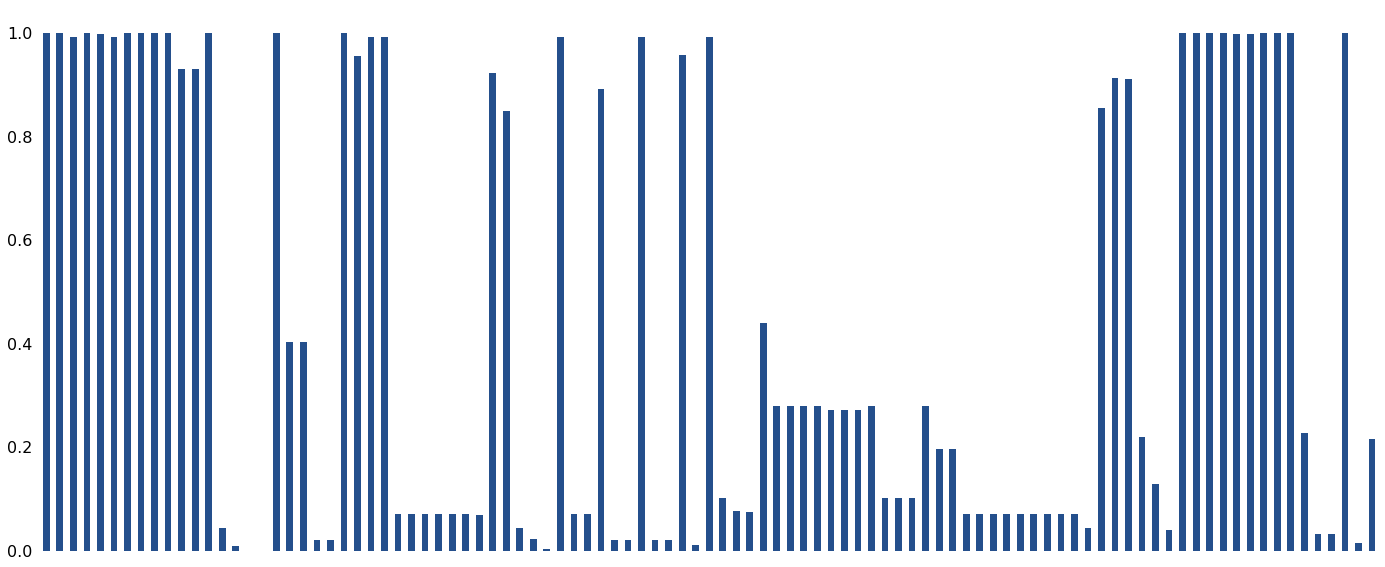

<matplotlib.axes._subplots.AxesSubplot at 0x7fb45fbacbe0>

In [0]:
msno.bar(data_1,color=(0.14,0.308,0.55))

In [0]:
# var=['P_SEXO',  'P_EDAD', 'PA1_GRP_ETNIC',   'PA_LUG_NAC',  'P_PARENTESCO', 'UA_CLASE']

var=['P_SEXO',  'P_EDAD', 'PA1_GRP_ETNIC',   'PA_LUG_NAC',  'P_PARENTESCO', 'UA_CLASE']


In [0]:
data_2=data_1[var]

Out[14]:

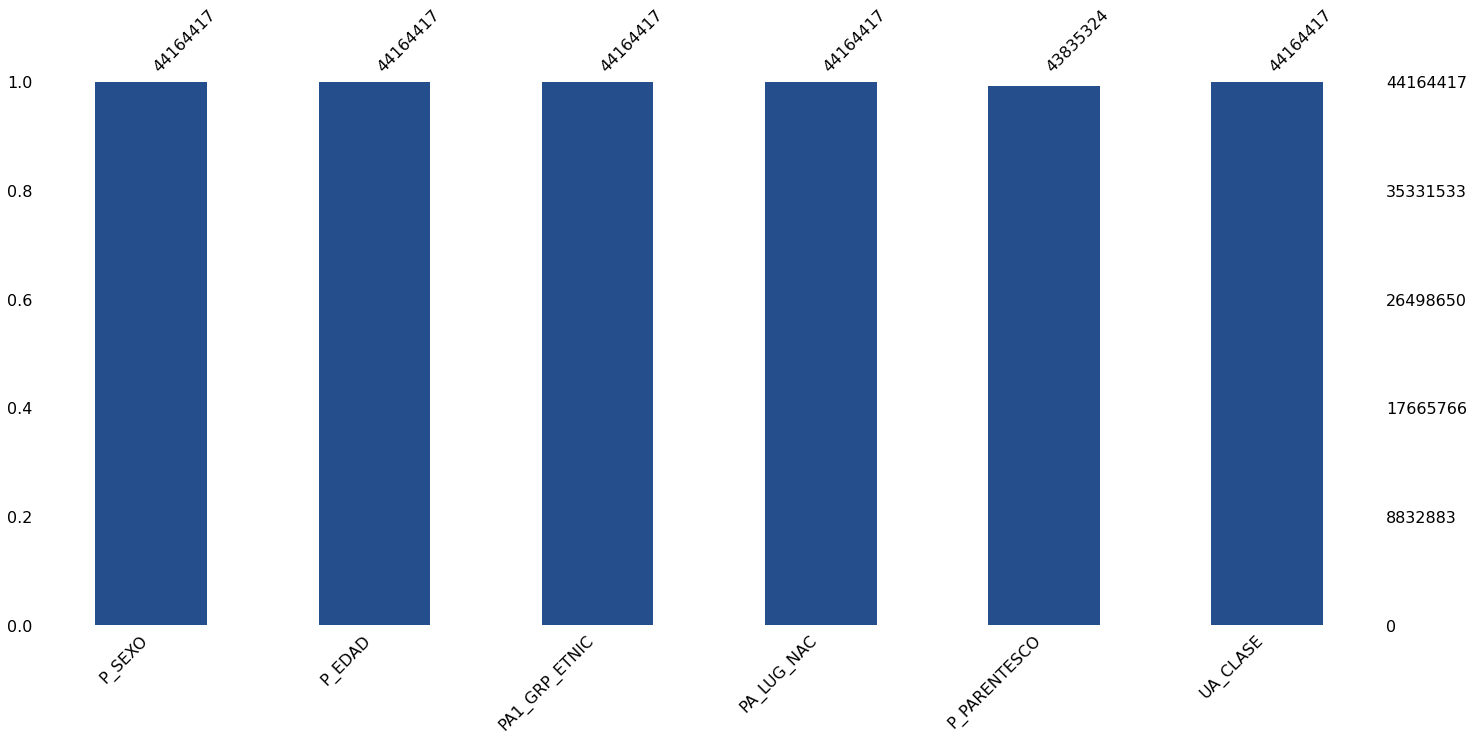

<matplotlib.axes._subplots.AxesSubplot at 0x7fb45f6ba6a0>

In [0]:
msno.bar(data_2,color=(0.14,0.308,0.55))

In [0]:
#'COD_ENCUESTAS', 'ID_VIVIENDA', 'ID_HOGAR', 'ID_PERSONA_HOGAR', 'PA_TIPO_DOC', 'P_NROHOG', 'UID_ORIGEN', 'P_NRO_PER', 'P_SEXO', 'P_EDAD', 'P_ALFABETA', 'P_NIVEL_ANOS', 'PA1_GRP_ETNIC', 'PA11_COD_ETNIA', 'PA12_CLAN', 'PA21_COD_VITSA', 'PA22_COD_KUMPA', 'PA_LUG_NAC', 'PA1_DPTO_NAC', 'PA2_MPIO_NAC', 'PA3_PAIS_NAC', 'PA31_ANO_LLEGO', 'PA_SABE_FECHA', 'PA1_FECHA_NAC', 'P_PARENTESCO', 'CONDICION_FISICA', 'P_LIM_PPAL', 'P_CAUSA_LIM', 'PA_AYUDA_TEC', 'PB_AYUDA_PERS', 'PC_AYUDA_MED', 'PD_AYUDA_ANCES', 'P_CUIDA', 'PA_ASISTENCIA', 'P_TRABAJO', 'PA_HABLA_LENG', 'PA1_ENTIENDE', 'PB1_QOTRAS_LENG', 'PA_VIVIA_5ANOS', 'PA1_DPTO_5ANOS', 'PA2_MPIO_5ANOS', 'PA21_CLASE_5ANOS', 'PA3_PAIS_5ANO', 'PA31_ANO_LLEGA5', 'PA_VIVIA_1ANO', 'PA1_DPTO_1ANO', 'PA2_MPIO_1ANO', 'PA21_CLASE_1ANO', 'PA3_PAIS_1ANO', 'P_ENFERMO', 'P_QUEHIZO_PPAL', 'PA_LO_ATENDIERON', 'PA1_CALIDAD_SERV', 'PA_HNV', 'PA1_THNV', 'PA2_HNVH', 'PA3_HNVM', 'PA_HNVS', 'PA1_THSV', 'PA2_HSVH', 'PA3_HSVM', 'PA_HFC', 'PA1_THFC', 'PA2_HFCH', 'PA3_HFCM', 'PA_UHNV', 'PA1_MES_UHNV', 'PA2_ANO_UHNV', 'PA_OIR', 'PB_HABLAR', 'PC_VER', 'PD_CAMINAR', 'PE_COGER', 'PF_DECIDIR', 'PG_COMER', 'PH_RELACION', 'PI_TAREAS', 'PB_OTRAS_LENG', 'P_EST_CIVIL', 'REGIMEN', 'ESTADO_AFILIACION', 'CODIGO_AFP', 'VICTIMA', 'PENSIONADO', 'U_DPTO', 'U_MPIO', 'UA_CLASE', 'UA2_CPOB', 'UA1_LOCALIDAD', 'U_CO', 'U_AO', 'U_UC', 'COD_DANE', 'UVA_ESTATER', 'UVA1_TIPOTER', 'UVA2_CODTER', 'UVA_ESTA_AREAPROT', 'UVA1_COD_AREAPROT', 'LOCALIDAD'#


In [0]:
data2=data1
data2 = data2.fillna("9999")
#data2 = data2.withColumn("P_EDAD", col("P_EDAD").cast(IntegerType()))
data2 = data2.withColumn('NEGROS', when(data2.PA1_GRP_ETNIC == "5", 1).otherwise(0))
data2 = data2.select('P_SEXO', 'PA11_COD_ETNIA', 'PA12_CLAN', 'PA_LUG_NAC', 'PA1_DPTO_NAC', 'P_PARENTESCO', 'UA_CLASE', 'UVA_ESTATER', 'UVA1_TIPOTER', 'UVA2_CODTER', 'NEGROS')
data2.schema

Out[28]: StructType(List(StructField(P_SEXO,StringType,false),StructField(PA11_COD_ETNIA,StringType,false),StructField(PA12_CLAN,StringType,false),StructField(PA_LUG_NAC,StringType,false),StructField(PA1_DPTO_NAC,StringType,false),StructField(P_PARENTESCO,StringType,false),StructField(UA_CLASE,StringType,false),StructField(UVA_ESTATER,StringType,false),StructField(UVA1_TIPOTER,StringType,false),StructField(UVA2_CODTER,StringType,false),StructField(NEGROS,IntegerType,false)))

In [0]:
# manual parameters
RANDOM_SEED = 42
TRAINING_SAMPLE = 1500000
VALIDATE_SIZE = 0.2

# setting random seeds for libraries to ensure reproducibility
#np.random.seed(RANDOM_SEED)
#rn.seed(RANDOM_SEED)
#tf.random.set_seed(RANDOM_SEED)

nigga = data2.filter((f.col("NEGROS") == 1))
others = data2.filter((f.col("NEGROS") == 0))

nigga = nigga.toPandas()


In [0]:
others = others.toPandas().sample(frac=0.075, replace=False, random_state=1).reset_index(drop=True)

# training set: exlusively non-fraud transactions
#X_train = nigga.iloc[:2000000].drop('NEGROS', axis=1)
#X_train = nigga.sample(frac=0.67, replace=False, random_state=1).reset_index(drop=True)
# testing  set: the remaining non-fraud + all the fraud 
#X_test = nigga.iloc[2000001:] .append(others).sample(frac=1)

nigga1 = nigga.append(others).sample(frac=1)

In [0]:
import random

random.seed(100)
print(random.random())


0.1456692551041303

In [0]:
nigga2=pd.get_dummies(nigga1)

In [0]:
nigga2

Out[33]:

,NEGROS,P_SEXO_1,P_SEXO_2,PA11_COD_ETNIA_10,PA11_COD_ETNIA_100,PA11_COD_ETNIA_110,PA11_COD_ETNIA_130,PA11_COD_ETNIA_140,PA11_COD_ETNIA_150,PA11_COD_ETNIA_170,PA11_COD_ETNIA_180,PA11_COD_ETNIA_190,PA11_COD_ETNIA_20,PA11_COD_ETNIA_200,PA11_COD_ETNIA_21,PA11_COD_ETNIA_210,PA11_COD_ETNIA_220,PA11_COD_ETNIA_230,PA11_COD_ETNIA_240,PA11_COD_ETNIA_25,PA11_COD_ETNIA_250,PA11_COD_ETNIA_251,PA11_COD_ETNIA_252,PA11_COD_ETNIA_26,PA11_COD_ETNIA_260,PA11_COD_ETNIA_270,PA11_COD_ETNIA_280,PA11_COD_ETNIA_281,PA11_COD_ETNIA_282,PA11_COD_ETNIA_283,PA11_COD_ETNIA_284,PA11_COD_ETNIA_285,PA11_COD_ETNIA_290,PA11_COD_ETNIA_291,PA11_COD_ETNIA_292,PA11_COD_ETNIA_30,PA11_COD_ETNIA_300,PA11_COD_ETNIA_310,PA11_COD_ETNIA_320,PA11_COD_ETNIA_330,...,UVA2_CODTER_2155,UVA2_CODTER_2156,UVA2_CODTER_2158,UVA2_CODTER_2159,UVA2_CODTER_2160,UVA2_CODTER_2161,UVA2_CODTER_2162,UVA2_CODTER_2163,UVA2_CODTER_2164,UVA2_CODTER_2165,UVA2_CODTER_2166,UVA2_CODTER_2167,UVA2_CODTER_2168,UVA2_CODTER_2169,UVA2_CODTER_2170,UVA2_CODTER_2171,UVA2_CODTER_2172,UVA2_CODTER_2173,UVA2_CODTER_2174,UVA2_CODTER_2176,UVA2_CODTER_2177,UVA2_CODTER_2178,UVA2_CODTER_2179,UVA2_CODTER_2180,UVA2_CODTER_2181,UVA2_CODTER_2183,UVA2_CODTER_2184,UVA2_CODTER_2186,UVA2_CODTER_2187,UVA2_CODTER_2188,UVA2_CODTER_2189,UVA2_CODTER_2190,UVA2_CODTER_2191,UVA2_CODTER_2192,UVA2_CODTER_2194,UVA2_CODTER_2195,UVA2_CODTER_2196,UVA2_CODTER_2197,UVA2_CODTER_2198,UVA2_CODTER_9999
1577674,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1927107,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2464976,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
762589,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
147570,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364045,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1776346,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1573046,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1150545,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
nigga2.columns

Out[34]: Index(['NEGROS', 'P_SEXO_1', 'P_SEXO_2', 'PA11_COD_ETNIA_10',
 'PA11_COD_ETNIA_100', 'PA11_COD_ETNIA_110', 'PA11_COD_ETNIA_130',
 'PA11_COD_ETNIA_140', 'PA11_COD_ETNIA_150', 'PA11_COD_ETNIA_170',
 ...
 'UVA2_CODTER_2189', 'UVA2_CODTER_2190', 'UVA2_CODTER_2191',
 'UVA2_CODTER_2192', 'UVA2_CODTER_2194', 'UVA2_CODTER_2195',
 'UVA2_CODTER_2196', 'UVA2_CODTER_2197', 'UVA2_CODTER_2198',
 'UVA2_CODTER_9999'],
 dtype='object', length=1142)

In [0]:
nigga3 = nigga2[(nigga2["NEGROS"]==1)]
others1 = nigga2[(nigga2["NEGROS"]==0)]

In [0]:
others1

Out[36]:

,NEGROS,P_SEXO_1,P_SEXO_2,PA11_COD_ETNIA_10,PA11_COD_ETNIA_100,PA11_COD_ETNIA_110,PA11_COD_ETNIA_130,PA11_COD_ETNIA_140,PA11_COD_ETNIA_150,PA11_COD_ETNIA_170,PA11_COD_ETNIA_180,PA11_COD_ETNIA_190,PA11_COD_ETNIA_20,PA11_COD_ETNIA_200,PA11_COD_ETNIA_21,PA11_COD_ETNIA_210,PA11_COD_ETNIA_220,PA11_COD_ETNIA_230,PA11_COD_ETNIA_240,PA11_COD_ETNIA_25,PA11_COD_ETNIA_250,PA11_COD_ETNIA_251,PA11_COD_ETNIA_252,PA11_COD_ETNIA_26,PA11_COD_ETNIA_260,PA11_COD_ETNIA_270,PA11_COD_ETNIA_280,PA11_COD_ETNIA_281,PA11_COD_ETNIA_282,PA11_COD_ETNIA_283,PA11_COD_ETNIA_284,PA11_COD_ETNIA_285,PA11_COD_ETNIA_290,PA11_COD_ETNIA_291,PA11_COD_ETNIA_292,PA11_COD_ETNIA_30,PA11_COD_ETNIA_300,PA11_COD_ETNIA_310,PA11_COD_ETNIA_320,PA11_COD_ETNIA_330,...,UVA2_CODTER_2155,UVA2_CODTER_2156,UVA2_CODTER_2158,UVA2_CODTER_2159,UVA2_CODTER_2160,UVA2_CODTER_2161,UVA2_CODTER_2162,UVA2_CODTER_2163,UVA2_CODTER_2164,UVA2_CODTER_2165,UVA2_CODTER_2166,UVA2_CODTER_2167,UVA2_CODTER_2168,UVA2_CODTER_2169,UVA2_CODTER_2170,UVA2_CODTER_2171,UVA2_CODTER_2172,UVA2_CODTER_2173,UVA2_CODTER_2174,UVA2_CODTER_2176,UVA2_CODTER_2177,UVA2_CODTER_2178,UVA2_CODTER_2179,UVA2_CODTER_2180,UVA2_CODTER_2181,UVA2_CODTER_2183,UVA2_CODTER_2184,UVA2_CODTER_2186,UVA2_CODTER_2187,UVA2_CODTER_2188,UVA2_CODTER_2189,UVA2_CODTER_2190,UVA2_CODTER_2191,UVA2_CODTER_2192,UVA2_CODTER_2194,UVA2_CODTER_2195,UVA2_CODTER_2196,UVA2_CODTER_2197,UVA2_CODTER_2198,UVA2_CODTER_9999
1577674,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1927107,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
762589,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
147570,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2466855,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512885,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2440273,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2364045,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1776346,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
X_train, nigga4=train_test_split(nigga3,  test_size=0.33,random_state=1) 

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-2254183343672013> in <module> 
 ----> 1 X_train , nigga4 = train_test_split ( nigga3 , test_size = 0.33 , random_state = 1 ) 

 NameError : name 'nigga3' is not defined

In [0]:
X_test = nigga4.append(others1).sample(frac=1)

In [0]:
X_train


Out[39]:

,NEGROS,P_SEXO_1,P_SEXO_2,PA11_COD_ETNIA_10,PA11_COD_ETNIA_100,PA11_COD_ETNIA_110,PA11_COD_ETNIA_130,PA11_COD_ETNIA_140,PA11_COD_ETNIA_150,PA11_COD_ETNIA_170,PA11_COD_ETNIA_180,PA11_COD_ETNIA_190,PA11_COD_ETNIA_20,PA11_COD_ETNIA_200,PA11_COD_ETNIA_21,PA11_COD_ETNIA_210,PA11_COD_ETNIA_220,PA11_COD_ETNIA_230,PA11_COD_ETNIA_240,PA11_COD_ETNIA_25,PA11_COD_ETNIA_250,PA11_COD_ETNIA_251,PA11_COD_ETNIA_252,PA11_COD_ETNIA_26,PA11_COD_ETNIA_260,PA11_COD_ETNIA_270,PA11_COD_ETNIA_280,PA11_COD_ETNIA_281,PA11_COD_ETNIA_282,PA11_COD_ETNIA_283,PA11_COD_ETNIA_284,PA11_COD_ETNIA_285,PA11_COD_ETNIA_290,PA11_COD_ETNIA_291,PA11_COD_ETNIA_292,PA11_COD_ETNIA_30,PA11_COD_ETNIA_300,PA11_COD_ETNIA_310,PA11_COD_ETNIA_320,PA11_COD_ETNIA_330,...,UVA2_CODTER_2155,UVA2_CODTER_2156,UVA2_CODTER_2158,UVA2_CODTER_2159,UVA2_CODTER_2160,UVA2_CODTER_2161,UVA2_CODTER_2162,UVA2_CODTER_2163,UVA2_CODTER_2164,UVA2_CODTER_2165,UVA2_CODTER_2166,UVA2_CODTER_2167,UVA2_CODTER_2168,UVA2_CODTER_2169,UVA2_CODTER_2170,UVA2_CODTER_2171,UVA2_CODTER_2172,UVA2_CODTER_2173,UVA2_CODTER_2174,UVA2_CODTER_2176,UVA2_CODTER_2177,UVA2_CODTER_2178,UVA2_CODTER_2179,UVA2_CODTER_2180,UVA2_CODTER_2181,UVA2_CODTER_2183,UVA2_CODTER_2184,UVA2_CODTER_2186,UVA2_CODTER_2187,UVA2_CODTER_2188,UVA2_CODTER_2189,UVA2_CODTER_2190,UVA2_CODTER_2191,UVA2_CODTER_2192,UVA2_CODTER_2194,UVA2_CODTER_2195,UVA2_CODTER_2196,UVA2_CODTER_2197,UVA2_CODTER_2198,UVA2_CODTER_9999
2775937,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2455744,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
646071,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2756518,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1004547,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2810047,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1456810,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
802416,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2404852,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
X_test

Out[40]:

,NEGROS,P_SEXO_1,P_SEXO_2,PA11_COD_ETNIA_10,PA11_COD_ETNIA_100,PA11_COD_ETNIA_110,PA11_COD_ETNIA_130,PA11_COD_ETNIA_140,PA11_COD_ETNIA_150,PA11_COD_ETNIA_170,PA11_COD_ETNIA_180,PA11_COD_ETNIA_190,PA11_COD_ETNIA_20,PA11_COD_ETNIA_200,PA11_COD_ETNIA_21,PA11_COD_ETNIA_210,PA11_COD_ETNIA_220,PA11_COD_ETNIA_230,PA11_COD_ETNIA_240,PA11_COD_ETNIA_25,PA11_COD_ETNIA_250,PA11_COD_ETNIA_251,PA11_COD_ETNIA_252,PA11_COD_ETNIA_26,PA11_COD_ETNIA_260,PA11_COD_ETNIA_270,PA11_COD_ETNIA_280,PA11_COD_ETNIA_281,PA11_COD_ETNIA_282,PA11_COD_ETNIA_283,PA11_COD_ETNIA_284,PA11_COD_ETNIA_285,PA11_COD_ETNIA_290,PA11_COD_ETNIA_291,PA11_COD_ETNIA_292,PA11_COD_ETNIA_30,PA11_COD_ETNIA_300,PA11_COD_ETNIA_310,PA11_COD_ETNIA_320,PA11_COD_ETNIA_330,...,UVA2_CODTER_2155,UVA2_CODTER_2156,UVA2_CODTER_2158,UVA2_CODTER_2159,UVA2_CODTER_2160,UVA2_CODTER_2161,UVA2_CODTER_2162,UVA2_CODTER_2163,UVA2_CODTER_2164,UVA2_CODTER_2165,UVA2_CODTER_2166,UVA2_CODTER_2167,UVA2_CODTER_2168,UVA2_CODTER_2169,UVA2_CODTER_2170,UVA2_CODTER_2171,UVA2_CODTER_2172,UVA2_CODTER_2173,UVA2_CODTER_2174,UVA2_CODTER_2176,UVA2_CODTER_2177,UVA2_CODTER_2178,UVA2_CODTER_2179,UVA2_CODTER_2180,UVA2_CODTER_2181,UVA2_CODTER_2183,UVA2_CODTER_2184,UVA2_CODTER_2186,UVA2_CODTER_2187,UVA2_CODTER_2188,UVA2_CODTER_2189,UVA2_CODTER_2190,UVA2_CODTER_2191,UVA2_CODTER_2192,UVA2_CODTER_2194,UVA2_CODTER_2195,UVA2_CODTER_2196,UVA2_CODTER_2197,UVA2_CODTER_2198,UVA2_CODTER_9999
1763506,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1932096,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1983564,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
512321,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1989979,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057931,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1126582,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1148888,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
106184,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
# train // validate - no labels since they're all clean anyway
X_train, X_validate = train_test_split(X_train, 
                                       test_size=VALIDATE_SIZE, 
                                       random_state=RANDOM_SEED)

# manually splitting the labels from the test df
X_test, y_test = X_test.drop('NEGROS', axis=1).values, X_test.NEGROS.values

X_train=X_train.drop('NEGROS', axis=1)
X_validate=X_validate.drop('NEGROS', axis=1)


--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-401292928895256> in <module> 
 1 # train // validate - no labels since they're all clean anyway 
 ----> 2 X_train, X_validate = train_test_split(X_train, 
 3 test_size = VALIDATE_SIZE , 
 4 random_state=RANDOM_SEED)
 5 

 NameError : name 'X_train' is not defined

In [0]:
print(f"""Shape of the datasets:
    training (rows, cols) = {X_train.shape}
    validate (rows, cols) = {X_validate.shape}
    holdout  (rows, cols) = {X_test.shape}""")

Shape of the datasets:
 training (rows, cols) = (1581238, 1141)
 validate (rows, cols) = (395310, 1141)
 holdout (rows, cols) = (4064600, 1141)

In [0]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline

# configure our pipeline
pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])

In [0]:
pipeline.fit(X_train)

Out[44]: Pipeline(steps=[('normalizer', Normalizer()), ('scaler', MinMaxScaler())])

In [0]:
# transform the training and validation data with these parameters
X_train_transformed = pipeline.transform(X_train)
X_validate_transformed = pipeline.transform(X_validate)

Error while obtaining a new communication channel

In [0]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
#from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing

In [0]:
# data dimensions // hyperparameters 
input_dim = X_train.shape[1]
BATCH_SIZE = 100
EPOCHS = 100

# https://keras.io/layers/core/
autoencoder = tf.keras.models.Sequential([
    
    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )), 
    tf.keras.layers.Dense(1141, activation='elu'),
    tf.keras.layers.Dense(500, activation='elu'),
    tf.keras.layers.Dense(300, activation='elu'),
    tf.keras.layers.Dense(10, activation='elu'),
    
    # reconstruction / decode
    tf.keras.layers.Dense(300, activation='elu'),
    tf.keras.layers.Dense(500, activation='elu'),
    tf.keras.layers.Dense(1141, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')
    
])

# https://keras.io/api/models/model_training_apis/
autoencoder.compile(optimizer="adam", 
                    loss='binary_crossentropy',
                    metrics=["acc"])

# print an overview of our model
autoencoder.summary()

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-401292928895262> in <module> 
 1 # data dimensions // hyperparameters 
 ----> 2 input_dim = X_train . shape [ 1 ] 
 3 BATCH_SIZE = 100 
 4 EPOCHS = 100 
 5 

 NameError : name 'X_train' is not defined

In [0]:
from datetime import datetime

# current date and time
yyyymmddHHMM = datetime.now().strftime('%Y%m%d%H%M')

# new folder for a new run
log_subdir = f'{yyyymmddHHMM}_batch{BATCH_SIZE}_layers{len(autoencoder.layers)}'

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath='autoencoder_best_weights.hdf5',
    save_best_only=True,
    monitor='val_loss',
    verbose=0,
    mode='min'
)

tensorboard = tf.keras.callbacks.TensorBoard(
    f'logs/{log_subdir}',
    batch_size=BATCH_SIZE,
    update_freq='batch'
)

# callbacks argument only takes a list
cb = [early_stop, save_model, tensorboard]

WARNING:tensorflow:`batch_size` is no longer needed in the `TensorBoard` Callback and will be ignored in TensorFlow 2.0.

In [0]:
history = autoencoder.fit(
    X_train, X_train,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=cb,
    validation_data=(X_validate, X_validate)
);

Epoch 1/8
 1/15813 [..............................] - ETA: 2:41:54 - loss: 0.1015 - acc: 0.0000e+00 3/15813 [..............................] - ETA: 10:28 - loss: 0.1167 - acc: 0.0500  7/15813 [..............................] - ETA: 6:15 - loss: 0.1076 - acc: 0.1461  10/15813 [..............................] - ETA: 5:47 - loss: 0.1000 - acc: 0.1558 13/15813 [..............................] - ETA: 5:30 - loss: 0.0943 - acc: 0.1538 17/15813 [..............................] - ETA: 5:09 - loss: 0.0885 - acc: 0.1463 20/15813 [..............................] - ETA: 5:03 - loss: 0.0852 - acc: 0.1440 23/15813 [..............................] - ETA: 5:01 - loss: 0.0827 - acc: 0.1503 27/15813 [..............................] - ETA: 4:55 - loss: 0.0803 - acc: 0.1636 31/15813 [..............................] - ETA: 4:50 - loss: 0.0788 - acc: 0.1784 35/15813 [..............................] - ETA: 4:45 - loss: 0.0777 - acc: 0.1933 39/15813 [..............................] - ETA: 4:41 - loss: 0.0770 - acc: 0.2075 43/15813 [..............................] - ETA: 4:38 - loss: 0.0766 - acc: 0.2207 47/15813 [..............................] - ETA: 4:35 - loss: 0.0763 - acc: 0.2329 51/15813 [..............................] - ETA: 4:33 - loss: 0.0761 - acc: 0.2440 55/15813 [..............................] - ETA: 4:31 - loss: 0.0759 - acc: 0.2540 59/15813 [..............................] - ETA: 4:29 - loss: 0.0758 - acc: 0.2633 63/15813 [..............................] - ETA: 4:28 - loss: 0.0758 - acc: 0.2717 67/15813 [..............................] - ETA: 4:26 - loss: 0.0758 - acc: 0.2795 71/15813 [..............................] - ETA: 4:25 - loss: 0.0758 - acc: 0.2868 75/15813 [..............................] - ETA: 4:24 - loss: 0.0758 - acc: 0.2936 79/15813 [..............................] - ETA: 4:23 - loss: 0.0758 - acc: 0.3000 83/15813 [..............................] - ETA: 4:22 - loss: 0.0758 - acc: 0.3061 87/15813 [..............................] - ETA: 4:21 - loss: 0.0759 - acc: 0.3117

In [0]:
# transform the test set with the pipeline fitted to the training set
#X_test_transformed = pipeline.transform(X_test)

# pass the transformed test set through the autoencoder to get the reconstructed result
reconstructions = autoencoder.predict(X_test)

In [0]:
# calculating the mean squared error reconstruction loss per row in the numpy array
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

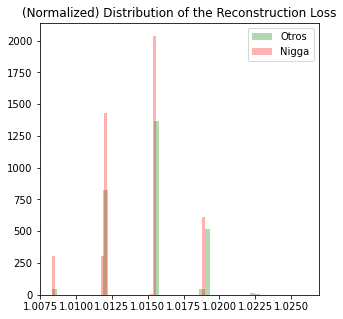

In [0]:
import matplotlib.pyplot as plt
OTROS = mse[y_test==0]
NIGGI = mse[y_test==1]

fig, ax = plt.subplots(figsize=(5,5))

ax.hist(OTROS, bins=50, density=True, label="Otros", alpha=.3, color="green")
ax.hist(NIGGI, bins=50, density=True, label="Nigga", alpha=.3, color="red")

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.legend()
plt.show()

In [0]:
loss, accuracy = autoencoder.evaluate(X_test_transformed)
print("Accuracy", accuracy)

1/29690 [..............................] - ETA: 43:51 - loss: 0.0000e+00 - acc: 0.0000e+00 48/29690 [..............................] - ETA: 31s - loss: 0.0000e+00 - acc: 0.0000e+00  99/29690 [..............................] - ETA: 30s - loss: 0.0000e+00 - acc: 0.0000e+00 154/29690 [..............................] - ETA: 29s - loss: 0.0000e+00 - acc: 0.0000e+00 210/29690 [..............................] - ETA: 28s - loss: 0.0000e+00 - acc: 0.0000e+00 263/29690 [..............................] - ETA: 28s - loss: 0.0000e+00 - acc: 0.0000e+00 323/29690 [..............................] - ETA: 27s - loss: 0.0000e+00 - acc: 0.0000e+00 384/29690 [..............................] - ETA: 26s - loss: 0.0000e+00 - acc: 0.0000e+00 445/29690 [..............................] - ETA: 26s - loss: 0.0000e+00 - acc: 0.0000e+00 507/29690 [..............................] - ETA: 26s - loss: 0.0000e+00 - acc: 0.0000e+00 564/29690 [..............................] - ETA: 26s - loss: 0.0000e+00 - acc: 0.0000e+00 624/29690 [..............................] - ETA: 25s - loss: 0.0000e+00 - acc: 0.0000e+00 683/29690 [..............................] - ETA: 25s - loss: 0.0000e+00 - acc: 0.0000e+00 742/29690 [..............................] - ETA: 25s - loss: 0.0000e+00 - acc: 0.0000e+00 800/29690 [..............................] - ETA: 25s - loss: 0.0000e+00 - acc: 0.0000e+00 859/29690 [..............................] - ETA: 25s - loss: 0.0000e+00 - acc: 0.0000e+00 919/29690 [..............................] - ETA: 25s - loss: 0.0000e+00 - acc: 0.0000e+00 978/29690 [..............................] - ETA: 25s - loss: 0.0000e+00 - acc: 0.0000e+00 1037/29690 [>.............................] - ETA: 25s - loss: 0.0000e+00 - acc: 0.0000e+00 1096/29690 [>.............................] - ETA: 25s - loss: 0.0000e+00 - acc: 0.0000e+00 1153/29690 [>.............................] - ETA: 25s - loss: 0.0000e+00 - acc: 0.0000e+00 1211/29690 [>.............................] - ETA: 24s - loss: 0.0000e+00 - acc: 0.0000e+00

In [0]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, classification_report

THRESHOLD = 1

def mad_score(points):
    """https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm """
    m = np.median(points)
    ad = np.abs(points - m)
    mad = np.median(ad)
    
    return 0.6745 * ad / mad

z_scores = mad_score(mse)
outliers = z_scores > THRESHOLD

In [0]:
print(f"Detected {np.sum(outliers):,} outliers in a total of {np.size(z_scores):,} transactions [{np.sum(outliers)/np.size(z_scores):.2%}].")

Detected 139,511 outliers in a total of 4,064,600 transactions [3.43%].

In [0]:
#from sklearn.metrics import (confusion_matrix, 
#                             precision_recall_curve)

# get (mis)classification
cm = confusion_matrix(y_test, outliers)

# true/false positives/negatives
(tn, fp, 
 fn, tp) = cm.flatten()

In [0]:
print(f"""The classifications using the MAD method with threshold={THRESHOLD} are as follows:
{cm}

% of transactions labeled as fraud that were correct (precision): {tp}/({fp}+{tp}) = {tp/(fp+tp):.2%}
% of fraudulent transactions were caught succesfully (recall):    {tp}/({fn}+{tp}) = {tp/(fn+tp):.2%}""")

The classifications using the MAD method with threshold=1 are as follows:
[[3014852 76224]
 [ 910237 63287]]

% of transactions labeled as fraud that were correct (precision): 63287/(76224+63287) = 45.36%
% of fraudulent transactions were caught succesfully (recall): 63287/(910237+63287) = 6.50%